# Solving (Mixed) Integer Linear Programming Models
## Mehmet Gönen
## November 23, 2022

In [1]:
# load libraries
import numpy as np
import scipy.sparse as sp

import cplex as cp

In [2]:
def mixed_integer_linear_programming(direction, A, senses, b, c, l, u, types):
    # create an empty optimization problem
    prob = cp.Cplex()

    # add decision variables to the problem including their coefficients in objective and ranges
    prob.variables.add(obj = c.tolist(), lb = l.tolist(), ub = u.tolist(), types = types.tolist())

    # define problem type
    if direction == "maximize":
        prob.objective.set_sense(prob.objective.sense.maximize)
    else:
        prob.objective.set_sense(prob.objective.sense.minimize)

    # add constraints to the problem including their directions and right-hand side values
    prob.linear_constraints.add(senses = senses.tolist(), rhs = b.tolist())

    # add coefficients for each constraint
    row_indices, col_indices = A.nonzero()
    prob.linear_constraints.set_coefficients(zip(row_indices.tolist(), col_indices.tolist(), A.data.tolist()))

    # solve the problem
    print(prob.write_as_string())
    prob.solve()

    # check the solution status
    print(prob.solution.get_status())
    print(prob.solution.status[prob.solution.get_status()])

    # get the solution
    x_star = prob.solution.get_values()
    obj_star = prob.solution.get_objective_value()

    return(x_star, obj_star)

## The warehouse location problem
In modeling distribution systems, decisions must be made about tradeoffs between transportation costs and costs for operating distribution centers. As an example, suppose that a manager must decide which of $M$ warehouses to use for meeting the demands of $N$ customers for a good. The decisions to be made are which warehouses to operate and how much to ship from any warehouse to any customer. Let

\begin{align*}
y_{i} &= \begin{cases} 1 & \textrm{if warehouse $i$ is opened,}\\
0 & \textrm{if warehouse $i$ is not opened;}\end{cases} \\
x_{ij} &= \textrm{Amount to be sent from warehouse $i$ to customer $j$}.
\end{align*}

The relevant costs are:

\begin{align*}
f_{i} &= \textrm{fixed operating cost for warehouse $i$, if opened (for example, a cost to lease the warehouse),}\\
c_{ij} &= \textrm{per-unit operating cost at warehouse $i$ plus the transportation cost for shipping from warehouse $i$ to customer $j$.}
\end{align*}

There are two types of constraints for the model:
1. the demand $d_{j}$ of each customer must be filled from the warehouses; and
2. goods can be shipped from a warehouse only if it is opened.

The model is:

\begin{align*}
\mbox{minimize} \;\;& \sum\limits_{i = 1}^{M} \sum\limits_{j = 1}^{N} c_{ij} x_{ij} + \sum\limits_{i = 1}^{M} f_{i}y_{i} \\
\mbox{subject to:} \;\;& \sum\limits_{i = 1}^{M} x_{ij} = d_{j} \;\;\;\; j = 1, 2, \dots, N\\
\;\;& \sum\limits_{j = 1}^{N} x_{ij} - y_{i} \left(\sum\limits_{j = 1}^{N} d_{j}\right) \leq 0 \;\;\;\; i = 1, 2, \dots, M\\
\;\;& x_{ij} \geq 0 \;\;\;\; i = 1, 2, \dots, M; j = 1, 2, \dots, N\\
\;\;& y_{i} \in \{0, 1\} \;\;\;\; i = 1, 2, \dots, M
\end{align*}

\begin{align*}
\mbox{minimize} \;\;& c_{11}x_{11} + c_{12}x_{12} + c_{13}x_{13} + c_{21}x_{21} + c_{22}x_{22} + c_{23}x_{23} + f_{1} y_{1} + f_{2} y_{2} \\
\mbox{subject to:} \;\;& + x_{11} \phantom{+ x_{12} + x_{13}\:\:}  + x_{21} \phantom{+ x_{22} + x_{23} + (d_{1} + d_{2} + d_{3})y_{1} + (d_{1} + d_{2} + d_{3})y_{2}\:\:} = d_{1}\\
\;\;& \phantom{+ x_{11}\:\:} + x_{12} \phantom{+ x_{13} + x_{21}\:\:} + x_{22} \phantom{+ x_{23} + (d_{1} + d_{2} + d_{3})y_{1} + (d_{1} + d_{2} + d_{3})y_{2}\:\:} = d_{2}\\
\;\;& \phantom{+ x_{11} + x_{12}\:\:} + x_{13} \phantom{+x_{21} + x_{22}\:\:}+ x_{23}  \phantom{+ (d_{1} + d_{2} + d_{3})y_{1} + (d_{1} + d_{2} + d_{3})y_{2}\:\:} = d_{3}\\
\;\;& + x_{11} + x_{12} + x_{13} \phantom{+ x_{21} + x_{22} + x_{23}\:\:} - (d_{1} + d_{2} + d_{3})y_{1} \phantom{+ (d_{1} + d_{2} + d_{3})y_{2}\:\:} \leq 0\\
\;\;&  \phantom{+x_{11} + x_{12} + x_{13}\:\:} + x_{21} + x_{22} + x_{23} \phantom{- (d_{1} + d_{2} + d_{3})y_{1}\:\:} - (d_{1} + d_{2} + d_{3})y_{2} \leq 0\\
\;\;& x_{11} \geq 0\\
\;\;& x_{12} \geq 0\\
\;\;& x_{13} \geq 0\\
\;\;& x_{21} \geq 0\\
\;\;& x_{22} \geq 0\\
\;\;& x_{23} \geq 0\\
\;\;& y_{1} \in \{0, 1\}\\
\;\;& y_{2} \in \{0, 1\}
\end{align*}

[[   1.    0.    0.    1.    0.    0.    0.    0.]
 [   0.    1.    0.    0.    1.    0.    0.    0.]
 [   0.    0.    1.    0.    0.    1.    0.    0.]
 [   1.    1.    1.    0.    0.    0. -600.    0.]
 [   0.    0.    0.    1.    1.    1.    0. -600.]]
(array([0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4], dtype=int32), array([0, 3, 1, 4, 2, 5, 0, 1, 2, 6, 3, 4, 5, 7], dtype=int32))


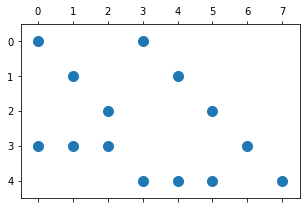

In [3]:
costs = np.array([27, 55, 90, 13, 48, 39])
fixed_costs = np.array([12000, 14000])
demands = np.array([100, 300, 200])

names = np.array(["x_1_1", "x_1_2", "x_1_3", "x_2_1", "x_2_2", "x_2_3", "y_1", "y_2"])
c = np.concatenate((costs, fixed_costs))
senses = np.concatenate((np.repeat("E", 3), np.repeat("L", 2)))
b = np.concatenate((demands, np.repeat(0, 2)))
l = np.concatenate((np.repeat(0, 6), np.repeat(0, 2)))
u = np.concatenate((np.repeat(cp.infinity, 6), np.repeat(1, 2)))
types = np.concatenate((np.repeat("C", 6), np.repeat("B", 2)))

A = np.zeros((5, 8))
# customer 1
A[0, 0] = 1
A[0, 3] = 1
# customer 2
A[1, 1] = 1
A[1, 4] = 1
# customer 3
A[2, 2] = 1
A[2, 5] = 1
# warehouse 1
A[3, 0] = 1
A[3, 1] = 1
A[3, 2] = 1
A[3, 6] = -np.sum(demands)
# warehouse 2
A[4, 3] = 1
A[4, 4] = 1
A[4, 5] = 1
A[4, 7] = -np.sum(demands)

print(A)
A = sp.csr_matrix(A)
print(A.nonzero())

import matplotlib.pyplot as plt
plt.figure(figsize = (5, 8))
plt.spy(A, marker = "o")
plt.show()

In [4]:
x_star, obj_star = mixed_integer_linear_programming("minimize", A, senses, b, c, l, u, types)
print(names)
print(x_star)
print(obj_star)

Default variable names x1, x2 ... being created.
Default row names c1, c2 ... being created.


\ENCODING=ISO-8859-1
\Problem name: 

Minimize
 obj1: 27 x1 + 55 x2 + 90 x3 + 13 x4 + 48 x5 + 39 x6 + 12000 x7 + 14000 x8
Subject To
 c1: x1 + x4  = 100
 c2: x2 + x5  = 300
 c3: x3 + x6  = 200
 c4: x1 + x2 + x3 - 600 x7 <= 0
 c5: x4 + x5 + x6 - 600 x8 <= 0
Bounds
 0 <= x7 <= 1
 0 <= x8 <= 1
Binaries
 x7  x8 
End

Version identifier: 22.1.0.0 | 2022-03-09 | 1a383f8ce
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 49200.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 3 times.
MIP Presolve eliminated 2 rows and 2 columns.
MIP Presolve added 3 rows and 0 columns.
MIP Presolve modified 1 coefficients.
Aggregator did 6 substitutions.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.01 ticks)

Root node processing (before b&c):
  Real time             =    0.01 sec. (0.02 ticks)
Parallel b&c, 2 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
               

In [5]:
def warehouse_location_problem(costs, fixed_costs, demands):
    M = fixed_costs.size
    N = demands.size
    print(M)
    print(N)

    c = np.concatenate((costs, fixed_costs))
    senses = np.concatenate((np.repeat("E", N), np.repeat("L", M)))
    b = np.concatenate((demands, np.repeat(0, M)))
    l = np.concatenate((np.repeat(0, M * N), np.repeat(0, M)))
    u = np.concatenate((np.repeat(cp.infinity, M * N), np.repeat(1, M)))
    types = np.concatenate((np.repeat("C", M * N), np.repeat("B", M)))

    aij = np.concatenate((np.repeat(1, M * N),
                          np.tile(np.concatenate((np.repeat(1, N), [-np.sum(demands)])), M)))
    row = np.concatenate((np.repeat(range(N), M),
                          N + np.repeat(range(M), N + 1)))
    col = np.concatenate((np.array(range(M * N)).reshape(M, N).T.flatten(), 
                          np.concatenate([np.concatenate((np.arange(m * N, (m + 1) * N), [M * N + m])) for m in range(M)])))
    A = sp.csr_matrix((aij, (row, col)), shape = (M + N, M * N + M))

    x_star, obj_star = mixed_integer_linear_programming("minimize", A, senses, b, c, l, u, types)
    return(x_star, obj_star)

In [6]:
costs = np.array([27, 55, 90, 13, 48, 39])
fixed_costs = np.array([12000, 14000])
demands = np.array([100, 300, 200])

x_star, obj_star = warehouse_location_problem(costs, fixed_costs, demands)
print(names)
print(x_star)
print(obj_star)

Default variable names x1, x2 ... being created.
Default row names c1, c2 ... being created.


2
3
\ENCODING=ISO-8859-1
\Problem name: 

Minimize
 obj1: 27 x1 + 55 x2 + 90 x3 + 13 x4 + 48 x5 + 39 x6 + 12000 x7 + 14000 x8
Subject To
 c1: x1 + x4  = 100
 c2: x2 + x5  = 300
 c3: x3 + x6  = 200
 c4: x1 + x2 + x3 - 600 x7 <= 0
 c5: x4 + x5 + x6 - 600 x8 <= 0
Bounds
 0 <= x7 <= 1
 0 <= x8 <= 1
Binaries
 x7  x8 
End

Version identifier: 22.1.0.0 | 2022-03-09 | 1a383f8ce
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 49200.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 3 times.
MIP Presolve eliminated 2 rows and 2 columns.
MIP Presolve added 3 rows and 0 columns.
MIP Presolve modified 1 coefficients.
Aggregator did 6 substitutions.
All rows and columns eliminated.
Presolve time = 0.02 sec. (0.01 ticks)

Root node processing (before b&c):
  Real time             =    0.04 sec. (0.02 ticks)
Parallel b&c, 2 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
           